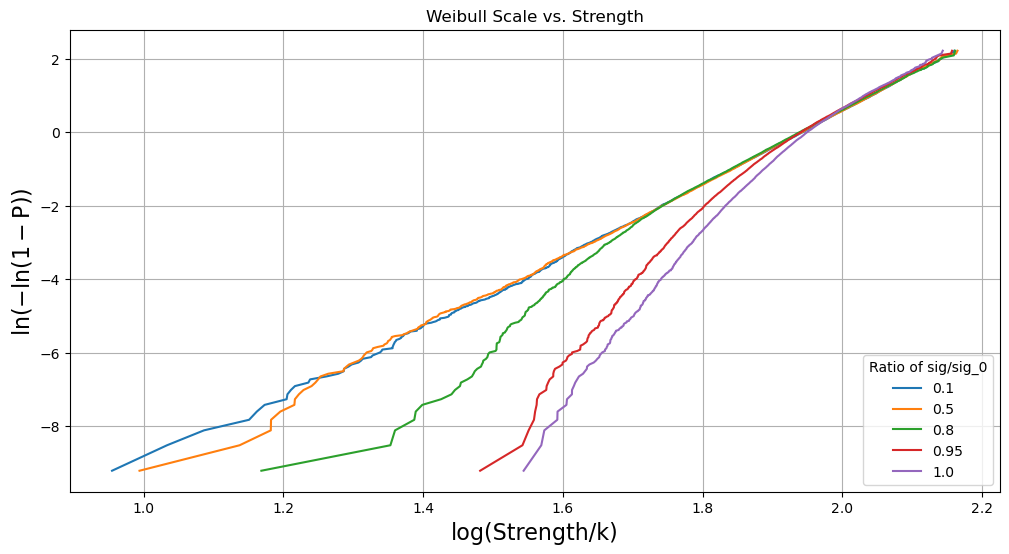

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

def plot_weibull_scale(directory):
    # Find all files that match the pattern
    file_list = glob.glob(os.path.join(directory, 'sqnom_strength_10_10_WG_uni*.csv'))
    
    # Extract labels and sort files based on numeric values in the labels
    file_label_pairs = [
        (f, float(os.path.basename(f).split('_')[-1].replace('uni', '').replace('p', '.').replace('.csv', '')))
        for f in file_list
    ]
    # Sort the pairs by the numeric value
    file_label_pairs.sort(key=lambda x: x[1])

    # Separate the sorted file paths and labels
    sorted_file_list, sorted_labels = zip(*file_label_pairs)

    plt.figure(figsize=(12, 6))

    # Create a twin axis for plotting the P values
    ax1 = plt.gca()  # Get current axis
    #ax2 = ax1.twinx()  # Create a secondary y-axis

    for file, label in zip(sorted_file_list, sorted_labels):
        
        # Load the data
        data = pd.read_csv(file)
        
        # Assuming the strength data is in the first column
        strength = data.iloc[:, 0].values
        
        # Sort the strength values
        strength_sorted = np.sort(strength)
        
        # Weibull probability calculation
        weibull_prob = np.linspace(1/(len(strength_sorted)+1), 1, len(strength_sorted))
        
        # Calculate the Weibull scale (ln(-ln(1-pdf)))
        weibull_scale = np.log(-np.log(1 - weibull_prob))
        
        # Plotting Weibull scale vs. Strength on the primary y-axis
        ax1.plot(np.log(strength_sorted/label), weibull_scale, label=f'{label}')
        
        # Plotting P value vs. Strength on the secondary y-axis
        #ax2.plot(strength_sorted, weibull_prob, '--', label=f'{label} (P)', alpha=0.7)

    ax1.set_xlabel('log(Strength/k)', fontsize=16)
    ax1.set_ylabel(r'$\ln(-\ln(1-\text{P}))$', fontsize=16)
    #ax2.set_ylabel('P value', fontsize=16)
    ax1.set_title('Weibull Scale vs. Strength')
    
    # Adding legends
    ax1.legend(title="Ratio of sig/sig_0", loc='lower right')
    #ax2.legend(title="P value", loc='upper right')

    ax1.grid(True)
    plt.show()

# Usage example:
directory = './'
plot_weibull_scale(directory)
